In [1]:
import pandas as pd

# Load data
df = pd.read_csv('/Users/kharva/Desktop/pythonPractice/house prediction/Housing.csv')

# Show first 5 rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df = df[["area", "bedrooms", "bathrooms", "stories", "parking","price"]]
print(df.isnull().sum())

area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
price        0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Features (independent variables)
X = df[["area", "bedrooms", "bathrooms", "stories", "parking"]]

# Target variable (dependent variable)
y = df["price"]
# Convert price to thousands
y = y / 1000  # This reduces large errors




In [4]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)




LinearRegression()

In [5]:
# Predict house prices
y_pred = model.predict(X_test)

# Show actual vs predicted prices
df_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(df_results.head())


     Actual    Predicted
316  4060.0  6178.627503
77   6650.0  6370.140859
360  3710.0  3283.148157
90   6440.0  4226.007948
493  2800.0  3409.685551


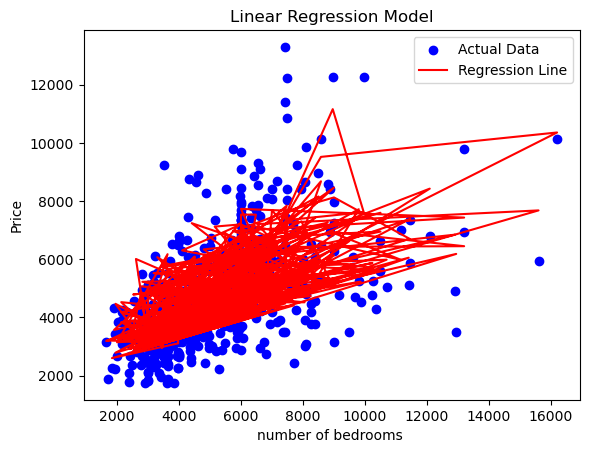

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X['area'], y, color="blue", label="Actual Data")
plt.plot(X['area'], model.predict(X), color="red", label="Regression Line")
plt.xlabel("number of bedrooms ")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression Model")
plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 1127.48
Mean Squared Error: 2292721.55
Root Mean Squared Error: 1514.17


In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.55


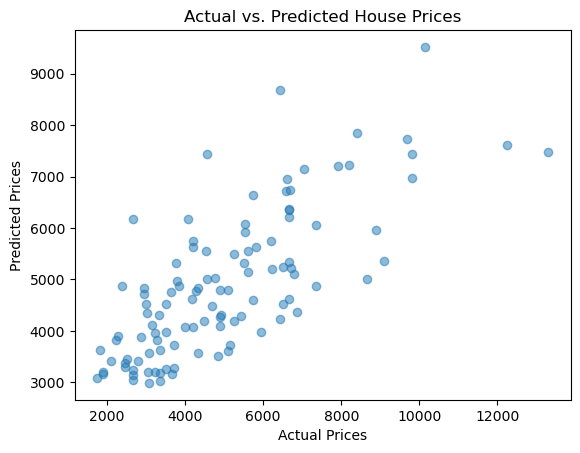

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()
